# Advantage and Disadvantage
When you have advantage, you roll two d20 and choose the highest. Disadvantage is same, but you choose the lowest.
Let's write some code and calculate expectation and deviation:

In [1]:
def exp(outcomes):
    exp = 0.
    for i in outcomes:
        exp += i
    exp /= len(outcomes)
    return exp

def dev(outcomes):
    dev = 0.
    for i in outcomes:
        dev += i ** 2
    dev /= len(outcomes)
    dev -= exp(outcomes) ** 2
    return dev

advantage_outcomes = [max(x, y) for x in range(1, 21) for y in range(1, 21)]
disadvantage_outcomes = [min(x, y) for x in range(1, 21) for y in range(1, 21)]

print("Advantage expectation: " + str(exp(advantage_outcomes)))
print("Advantage deviation: " + str(dev(advantage_outcomes)))
print("Disadvantage expectation: " + str(exp(disadvantage_outcomes)))
print("Disadvantage deviation: " + str(dev(disadvantage_outcomes)))

Advantage expectation: 13.825
Advantage deviation: 22.194375
Disadvantage expectation: 7.175
Disadvantage deviation: 22.194375


As it can be seen, advantage adds $3.325$ to the mean and disadvantage subtracts the same value, while both of their deviations are lowered by somewhat around $11$, which means improved consistency of throws.

### Honorable mention: Elven Accuracy
This feat is incredible in my opinion. Let's calculate expectation and deviation of a throw that is affected by this *triple-advantage feat*.

In [2]:
elven_outcomes = [max(x, y, z) for x in range(1, 21) for y in range(1, 21) for z in range(1, 21)]

print("Elven accuracy expectation: " + str(exp(elven_outcomes)))
print("Elven accuracy deviation: " + str(dev(elven_outcomes)))

Elven accuracy expectation: 15.4875
Elven accuracy deviation: 14.95834375


This feat adds $4.9875$ to the expectation and reduces deviation by somewhat around $18$, which means **greatly** improved consistency.

## Advantage versus +3 bonus: fight!
As we have just seen, advantage must be strictly better than a +$3$ bonus, because it's more consistent and it's mean value is higher than that of bare +$3$ bonus, which will be equal to $13.5$. But is it really *better* in all situations? Let's find out.

Here's the graphic that shows probability to hit the target while having either +$3$ bonus to hit or an advantage.

0.0975
0.1


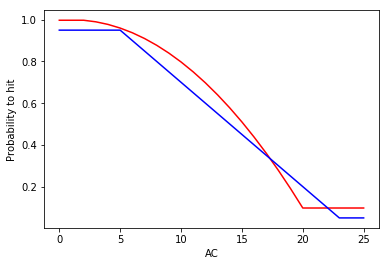

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def hits(AC, roll, bonus):
    return (roll + bonus >= AC and roll != 1) or roll == 20

adv_ac_hits = []
bon3_ac_hits = []

for AC in range(26):
    adv_cnt = 0.
    bon_cnt = 0.
    for adv_out in advantage_outcomes:
        if hits(AC, adv_out, 0):
            adv_cnt += 1
    for bon_out in range(1, 21):
        if hits(AC, bon_out, 3):
            bon_cnt += 1
    adv_ac_hits.append(adv_cnt / len(advantage_outcomes))
    bon3_ac_hits.append(bon_cnt  / 20)
            
print(adv_ac_hits[22])
print(bon3_ac_hits[22])
plt.plot(adv_ac_hits, 'r')
plt.plot(bon3_ac_hits, 'b')
plt.ylabel("Probability to hit")
plt.xlabel("AC")
plt.show()

Сounterintuitively, in *some* cases constant bonus is better than advantage. It can be seen that when Armor Class is bigger or equal to $18$ and less than $23$, constant bonus is strictly better in terms of probability.

It happens because when rolling with advantage, but without any bonuses, you just *can't* get any value that exceeds $20$, but with bare bonus the result can be up to $23$, which results in bare bonus being better against high AC, which advantage can penetrate only on a natural $20$.